# Laboratorio 1 - Pregunta 3
### Hecho por: Daniel Alonso, Alvaro García Cid, Enrique Ramos e Ignacio Regidor

##Resumen
En está práctica se estudiará una base de datos de distintos "Pokemons" y sus distintos atributos. Se analizará si se puede reducir la dimensionalidad de estos atributos con nuevas componentes principales que describan estas características conservando un gran porcentaje de la información (PCA).

##Introducción al problema y pasos previos
A continuación se muestran las librerías de Python utilizadas en esta práctica.
- Numpy: utilizada por el resto de liberías, permite la creación y el manejo de datos de forma rápida y eficiente, conteniendo estructuras de datos propias. También nos permite realizar cálculos de algebra lineal, para trabajar en este caso con autovalores y sus autovectores asociados.
- Pandas: permite la creación y manejo de dataframes a partir de la base de datos empleada.
- Matplotlib.pyplot: se utilizará para ilustrar los distintos gráficos del PCA, que nos puedan aportar información del proceso y resultados.
- Scikit-learn: con nombre sklearn en cuánto a código en lenguaje Python, tiene muchas implementaciones útiles para el machine learning. En este caso, se utilizará para el preprocesamiento de datos (estandarización) y para realizar el PCA de forma alternativa (con la posterior comparación).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as scl

##Preprocesamiento de los datos

Se procede a importar la base de datos contenida en un archivo .csv

Se guarda en una variable <i>dataframe</i> creada con la librería pandas a la que se le llamará "datosraw".

También se muestran 5 Pokemons de este dataframe con la función .head() para observar los nombres y tipos de sus distintos atributos.

In [ ]:
datosraw = pd.read_csv("pokemon.csv", sep=',')
datosraw.head()

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


Se observa que cada pokemon tiene su nombre como clave primaria o identificador de tipo categórico, un atributo del tipo de Pokemos que es también categórico, y otros 6 atributos numéricos de los cuales se intentará reducir la dimensionalidad.

A continuación, con la función .shape, se obtiene que la base de datos contiene 20 pokemons, cada uno con su clave primaria y atributos diferentes (1+7=8).

In [ ]:
datosraw.shape

(20, 8)

En el siguiente paso, se buscan valores duplicados para su posterior eliminación.

El hecho de que haya 0 valores duplicados en el nombre del Pokemon, confirma que es la clave primaria y que no hay Pokemons duplicados o exactamente iguales.

Es decir, no hace falta eliminar ningún Pokemon.


In [ ]:
for c in datosraw.columns:
  print("Duplicated Values [{0}]:".format(c), datosraw[c].duplicated().sum())

Duplicated Values [Pokémon]: 0
Duplicated Values [Tipo]: 15
Duplicated Values [PS]: 16
Duplicated Values [Ataque]: 15
Duplicated Values [Defensa]: 16
Duplicated Values [Ataque especial]: 16
Duplicated Values [Defensa especial]: 16
Duplicated Values [Velocidad]: 15


Para el PCA, al ser un proceso no supervisado, se trabaja solo con las variables numéricas. Por este motivo, se creará un nuevo dataframe exclusivamente con estas.

In [ ]:
datos = datosraw[['PS','Ataque','Defensa','Ataque especial','Defensa especial','Velocidad']]
datos.head()

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,2,3,2,4,2,4
1,2,3,2,2,2,3
2,2,3,4,3,2,1
3,3,5,3,4,3,4
4,2,3,3,4,2,4


Una vez seleccionados los atributos, buscamos los Pokemons que tengan valores nulos para alguno de estos.

In [ ]:
for c in datos.columns:
  print("Missing Values [{0}]:".format(c), datos[c].isna().sum())

Missing Values [PS]: 0
Missing Values [Ataque]: 0
Missing Values [Defensa]: 0
Missing Values [Ataque especial]: 0
Missing Values [Defensa especial]: 0
Missing Values [Velocidad]: 0


Como no hay ningún valor de nulo, se procede directamente al siguiente paso del preprocesamiento de datos.

Este, es analizar los outliers o valores atípicos para los cuales el PCA es muy sensible. Se realizará hallando los cuartiles de los distintos atributos y representándolos con diagramas de cajas. 

Si se define el rango intercuartílico de la forma IQR = Q3 - Q1, los outliers serán los atributos que sean menores que Q1 - 1.5 * IQR y mayores que Q3 + 1.5 * IQR.

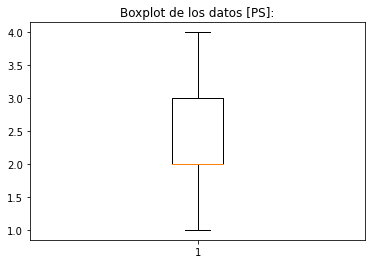

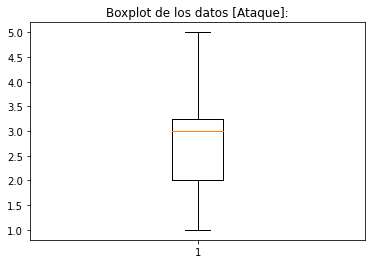

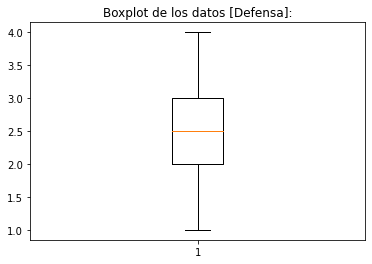

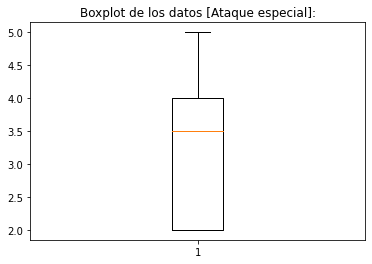

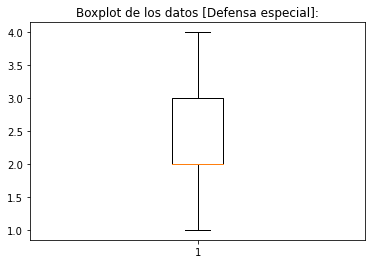

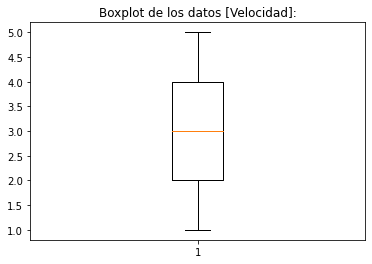

In [ ]:
for c in datos.columns:
  plt.boxplot(datos[c])
  plt.title("Boxplot de los datos [{0}]:".format(c))
  plt.show()

Se puede determinar a través de los diagramas que no hay ningún valor atípico en ningún atributo. Sin embargo, no se puede conocer mediante este proceso si una combinación de atributos sea atípica, aunque cada uno por separado no lo sea.

Una vez se ha realizado el preprocesamiento de los datos, se puede realizar el PCA con los atributos de los Pokemons. Aunque en muchos casos el PCA es parte del preprocesamiento de datos, en este caso, es el objetivo final de la práctica.

##1. Estandarizar los datos

Este paso, se realiza porque para el posterior cálculo de la varianza en el PCA, se utiliza el cuadrado de las unidades. Esto, haría que los atributos con mayor magnitud tengan demasiado peso sobre el resto. Aunque la estandarización también es un preprocesamiento de los datos brutos, este paso se considera parte del PCA dada su importancia en el proceso.

Para la estandarización, se utiliza el método StandardScaler de la librería Scikit-learn, que estandariza todos los atributos utilizando 0 de media y 1 de desviación típica.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datos)
matrix_std = scaler.transform(datos)
datos_std = pd.DataFrame(matrix_std, columns=['PS','Ataque','Defensa','Ataque especial','Defensa especial','Velocidad'])
datos_std.head()

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975


##Varianza o Explicación de los datos de las componentes principales

Una vez estandandarizados los datos, se calcula la matriz de covarianza y correlación, para estudiar cuál es mejor para el PCA y utilizarla. Esto, se debe a que las 2 son válidas para el PCA y cual sea mejor sólo depende del caso concreto

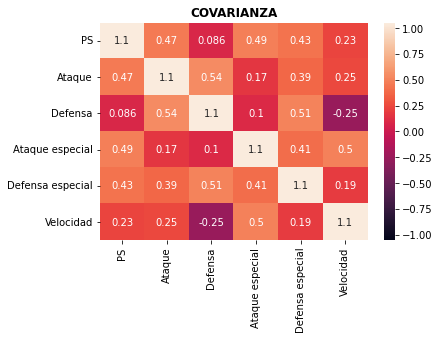

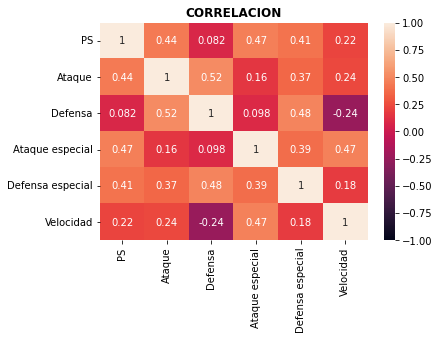

In [ ]:
# Dataframe covarianza entre variables.
cov_matrix = np.cov(np.transpose(datos_std))
indx = ['PS','Ataque','Defensa','Ataque especial','Defensa especial','Velocidad']
covarianza = pd.DataFrame(cov_matrix, index=indx, columns =indx)

# Dataframe correlación entre variables.
correlacion = datos_std.corr()

# Se grafican con un mapa de calor.
import seaborn as sbn
fig, ax = plt.subplots()
sbn.heatmap(covarianza, vmin=(-1)*cov_matrix.max(), vmax=cov_matrix.max(), annot=True);
ax.set_title('COVARIANZA', weight='bold')
fig2, ax2 = plt.subplots()
sbn.heatmap(correlacion, vmin=-1, vmax=1, annot=True);
ax2.set_title('CORRELACION', weight='bold')
plt.show()

Los valores de la diagonal de los mapas de calor parecen mejores en la matriz de correlación porque son exactamente 1, ya que con la covarianza se sobrepasa este valor ligeramente. Esto, no interesa para el PCA, ya que esta diagonal representa el cambio de una variable consigo misma. Además, al contar con los datos ya estandarizados, no se puede plantear como una posible solución.

A continuación, se estudia también cuál es mejor para el PCA entre la covarianza y la correlación mediante los autovalores asociados a sus matrices.

Con estos autovalores, se puede obtener el porcentaje de varianza y el porcentaje acumulado de las nuevas componentes.

Estas componentes, son los autovectores asociados a los autovalores, por lo que también se calcularán en el proceso. Los coeficientes de las componentes se utilizarán para realizar una combinación lineal de los atributos originales y explicar así toda la información posible sin correlaciones entre ellas al ser ortogonales.

In [ ]:
#Autovalores y autovectores asociados a la matriz de covarianza.
autovalores , autovectores = np.linalg.eig(covarianza)
print('Los autovalores de la matriz de covarianza son:\n', autovalores)
print('La suma de estos autovalores es:', sum(autovalores))

#Autovalores y autovectores asociados a la matriz de correlación.
autovalores2 , autovectores2 = np.linalg.eig(correlacion)
print('\nLos autovalores de la matriz de correlación son:\n', autovalores2)
print('La suma de estos autovalores es:', sum(autovalores2))

Los autovalores de la matriz de covarianza son:
 [2.62997944 1.55066147 0.16420572 0.47459774 0.71552145 0.78082366]
La suma de estos autovalores es: 6.315789473684211

Los autovalores de la matriz de correlación son:
 [2.49848047 1.4731284  0.15599543 0.45086785 0.67974537 0.74178248]
La suma de estos autovalores es: 6.000000000000002


La suma de los autovalores debería coincidir con el número de atributos, que es 6. 

Se oberva que la suma de los autovalores de la matriz de correlación se aproxima muchísimo más a este valor. De hecho, la diferencia respecto al valor 6 es tan insignificante, que debe ser resultado de pequeños errores de redondeo.

En las 2 comparaciones ha resultado mejor la matriz de correlación, por lo que esta es la que se utilizará para el PCA.

El siguiente paso es ordenar los autovalores de mayor a menor y sus autovectores asociados. Para ello, se siguen los siguientes pasos:

- Se crea un dataframe de la librería pandas con los autovalores sin ordenar y sus índices del 0 al 5.
- Se ordenan los autovalores de mayor a menor, manteniendo sus valores de índice originales.
- Se guarda en la variable <i>pos</i> el nuevo orden de los autovalores respecto al original.
- Se crea una nueva matriz de autovectores en la que se ordenan los originales en función del orden de la variable <i>pos</i> creada previamente.
- El dataframe de autovalores se reconvierte a vector.

In [ ]:
autovalores = pd.DataFrame(autovalores2)          # Se crea el dataframe.
autovalores.sort_values(0,inplace=True)           # Se ordenan los autovalores.
autovalores = autovalores[::-1]                   # Se ponen de mayor a menor.
pos = autovalores.index                           # Se guarda el nuevo orden.

autovectores = np.zeros((len(indx), len(indx)))   # Se inicializa la matriz.
for i in range(len(indx)):                        # Bucle del 0 al 5.
  autovectores[i] = autovectores2[pos[i]]         # Autovectores ordenados.
print('Los autovectores ordenados son:\n',autovectores)
                               
autovalores = autovalores2.copy()                 # Autovalores sin ordenar.
autovalores.sort()                                # Se ordenan.
autovalores = autovalores[::-1]                   # Se ponen de mayor a menor.
print('Los autovalores ordenados son:\n',autovalores)

Los autovectores ordenados son:
 [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]]
Los autovalores ordenados son:
 [2.49848047 1.4731284  0.74178248 0.67974537 0.45086785 0.15599543]


A continuación, se calcula la varianza que muestra cada autovalor o la cantidad de información que puede explicar. Para ello, se crean y estudian dos dataframes:
- Dataframe varianza: cada autovalor dividido entre la suma total de estos. Este último valor, es igual al número de autovalores y al de componentes originales.
- Dataframe varianza acumulada: igual que el anterior, pero al porcentaje de varianza de cada autovalor se le suman los porcentajes anteriores.

In [ ]:
# VECTORES NUMÉRICOS VARIANZA NORMAL Y ACUMULADA DE LOS AUTOVALORES

# Vector con la varianza de los autovalores
var_vector = autovalores * 100 / sum(autovalores)

# Vector con la varianza acumulada de los autovalores
var_ac_vector = var_vector.copy()
for i in range(len(indx)-1):
  var_ac_vector[i+1] = var_ac_vector[i+1] + var_ac_vector[i]


#DATAFRAMES A PARTIR DE LOS VECTORES CREADOS
indx2 = ['Componente 1','Componente 2','Componente 3','Componente 4','Componente 5','Componente 6']
aux=autovalores.reshape(1, -1)            # Autovalores en vector columna

# Dataframe con la varianza normal de los autovalores
aux2=var_vector.reshape(1, -1)            # Varianzas en vector columna
var_matrix = np.concatenate((aux,aux2))   # Matriz autovalores y sus varianzas
var_matrix2 = np.transpose(var_matrix)    #Transpuesta
var = pd.DataFrame(var_matrix2, index=indx2, columns=['Autovalor','Varianza Normal(%)'])

# Dataframe con la varianza acumulada de los autovalores
aux3 = var_ac_vector.reshape(1, -1)         # Var acumuladas en vector columna
var_ac_matrix = np.concatenate((aux,aux3))  # Matriz autovalores y sus varianzas
var_ac_matrix2 = np.transpose(var_ac_matrix)   #Transpuesta
var_ac = pd.DataFrame(var_ac_matrix2, index=indx2, columns=['Autovalor','Varianza Acumulada(%)'])

In [ ]:
var.head(6)

,Autovalor,Varianza Normal(%)
Componente 1,2.498480,41.641341
Componente 2,1.473128,24.552140
Componente 3,0.741782,12.363041
Componente 4,0.679745,11.329090
Componente 5,0.450868,7.514464
Componente 6,0.155995,2.599924


In [ ]:
var_ac.head(6)

,Autovalor,Varianza Acumulada(%)
Componente 1,2.498480,41.641341
Componente 2,1.473128,66.193481
Componente 3,0.741782,78.556522
Componente 4,0.679745,89.885612
Componente 5,0.450868,97.400076
Componente 6,0.155995,100.000000


A partir del diagrama de varianza acumulada, se puede observar que con 3 o 4 componentes ya sería suficiente para representar aproximadamente el 80% de la información. Para el PCA, se suele considerar suficiente.

Si se utilizasen solo 2 componentes, aunque estas tengan un gran porcentaje de varianza (41.6% y 24.5%) y por tanto de explicación de los datos, se perdería demasiada información (34%), ya que entre las 2, solo representan el 66% de la varianza acumulada.

Como con 3 componentes casi se alcanza el 80% de la varianza acumulada, dependería del caso particular y de la precisión necesaria, para saber si a nivel de coste computacional es rentable coger alguna componente más.

También, hay que tener en cuenta, que la cuarta componente representa un porcentaje bastante similar a la tercera de varianza, y con ella quedaría muy poca información sin explicar (< 11%). Por este motivo, si el caso lo requiere y los medios lo permiten, incluir una cuarta componente puede ser la mejor opción.

A continuación, se estudiarán las 2 componentes principales gráficamente.

##Diagrama de dispersión 2 componentes

Para calcular el valor de un Pokemon en una componente, se realiza el producto escalar entre el autovector asociado a la componente y el vector de atributos de ese Pokemon. 

En este caso, como el objetivo final de esta práctica es realizar el PCA y observar como se ven representados los atributos con sus magnitudes originales en las nuevas componentes, solo se utilizan los atributos estandarizados para un cálculo de las componentes más óptimo, pero estas se multiplican en el producto escalar por los atributos originales.

Si por ejemplo, estas nuevas componentes fueran introducidas en un proceso de machine learning supervisado, sería conveniente trabajar todo el tiempo con los datos estandarizados o estandarizar posteriormente los valores de los Pokemons en las nuevas componentes. Esto, siempre que se conociese el proceso inverso de la estandarización.

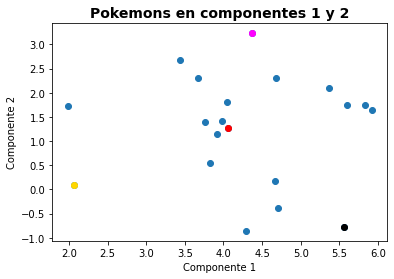

In [ ]:
# Se inicializan los valores de los Pokemons en las 2 componentes.
pokemons_componente1 = np.zeros(len(datos.index))
pokemons_componente2 = np.zeros(len(datos.index))

# Se convierte el dataframe con los datos a matriz para realizar operaciones.
datos_matrix = datos.to_numpy()

# Producto escalar entre componentes y atributos originales.
for i in range(len(datos.index)):
  for j in range(len(indx)):
    pokemons_componente1[i] = pokemons_componente1[i] + autovectores[0][j] * datos_matrix[i][j]
    pokemons_componente2[i] = pokemons_componente2[i] + autovectores[1][j] * datos_matrix[i][j]

# Se grafican todos los Pokemons en las 2 primeras componentes principales.
fig, ax = plt.subplots()
ax.scatter(pokemons_componente1, pokemons_componente2)
ax.scatter(pokemons_componente1[9], pokemons_componente2[9], color = 'r')
ax.scatter(pokemons_componente1[12], pokemons_componente2[12], color = 'magenta')
ax.scatter(pokemons_componente1[10], pokemons_componente2[10], color = 'gold')
ax.scatter(pokemons_componente1[16], pokemons_componente2[16], color = 'k')
ax.set_title('Pokemons en componentes 1 y 2', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.show()

En el diagrama, se han graficado todos los pokemons, y se han puesto 4 en otro color para analizarlos posteriormente más en detalle. 

En el gráfico, los Pokemons se encuentran bastante dispersos. Por ello, no existe una correlación entre las 2 componentes principales más importantes. Esto, se debe a que son los 2 autovectores que en conjunto tienen una mayor varianza y explicación de la información, y si existiese una correlación, estarían representando la misma información. Precisamente, se crean las componentes a partir de los atributos para que esto no ocurra.

A continuación, se muestra como explican estas componentes los atributos porcentualmente respecto al resto de componentes. Como los datos se han estandarizado antes del PCA, es representativa la comparación de porcentajes entre distintos atributos en una misma componente.

In [ ]:
expl_atributos_componente1 = abs(autovectores[0]*100/sum(abs(autovectores)))
df_expl_atributos_componente1 = pd.DataFrame(expl_atributos_componente1, index=indx, columns=['Explicación atributos componente 1 (%)'])

expl_atributos_componente2 = abs(autovectores[1]*100/sum(abs(autovectores)))
df_expl_atributos_componente2 = pd.DataFrame(expl_atributos_componente2, index=indx, columns=['Explicación atributos componente 2 (%)'])

In [ ]:
df_expl_atributos_componente1.style.set_table_styles([{'selector': 'th,td', 'props': [('font-size', '10pt'),('border-style','solid'),('border-width','1px')]}])

,Explicación atributos componente 1 (%)
PS,18.878213
Ataque,7.288995
Defensa,15.937229
Ataque especial,3.939305
Defensa especial,42.415061
Velocidad,3.305629


In [ ]:
print("Primera componente más importante;\n",autovectores[0])

Primera componente más importante;
 [ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]


Se observa que en la primera componente, influye notablemente el atributo de **defensa especial**. Además, **PS** y **defensa** tampoco tienen valores muy bajos, a diferencia de los atributos restantes. 
Esto, ocurre tanto en la explicación porcentual de estos atributos respecto al resto de componentes, como dentro de la propia componente entre las magnitudes de sus atributos.

Además, como se observa en la gráfica, los Pokemons en esta componente tenderán a tener valores positivos, ya que el único atributo multiplicado por un coeficiente negativo es el de ataque especial. Este, tiene una magnitud relativa baja, y por tanto, poca importancia en la componente.

In [ ]:
df_expl_atributos_componente2.style.set_table_styles([{'selector': 'th,td', 'props': [('font-size', '10pt'),('border-style','solid'),('border-width','1px')]}])

,Explicación atributos componente 2 (%)
PS,18.719872
Ataque,11.589894
Defensa,20.810603
Ataque especial,5.376212
Defensa especial,1.316955
Velocidad,33.128795


In [ ]:
print("Segunda componente más importante;\n",autovectores[1])

Segunda componente más importante;
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]


En esta componente, están más repartidos los atributos que tienen influencia, al superar 4 de ellos el 10%. La **velocidad** en esta componente tiene una gran importancia, y también la **defensa** y el **PS** cuentan con valores relativos altos. 

Es interesante como el atributo con mayor influencia en una componente, tiene el valor más bajo en la otra. Esto, permite explicar gran parte de la información, al poder representar un espectro de datos con bastante varianza. En la gráfica, esto se observa en la falta de correlación entre las componentes.

En este caso, también hay tendencia a valores positivos por el mismo motivo que en la otra componente, pero en este caso hay más coeficientes negativos y de mayor magnitud. Por este motivo, como se observa en la gráfica, algunos Pokemons tienen valores negativos y aunque la mayoría sean positivos estos son de menor magnitud en comparación con la otra componente.

Ahora, se analizan los 4 pokemons que no se han puesto como puntos de color azul. Se vuelven a mostrar la media y desviación típica calculadas de cada atributo para compararlos con los de cada caso concreto y poder así entender su posición en la gráfica.


In [ ]:
vector_medias_atr = np.zeros(len(indx))  # Se inicializa vector de medias.
vector_dtipica_atr = np.zeros(len(indx)) # Se inicializa vector de d. típicas.

# Se calculan en cada atributo.
for j in range(len(indx)):
  vector_medias_atr[j] = np.mean(datos_matrix[:,j])
  vector_dtipica_atr[j] = np.std(datos_matrix[:,j])

# Medias en vector columna
vector_medias_atr2 = vector_medias_atr.reshape(1, -1)
# Desviaciones típicas en vector columna      
vector_dtipica_atr2 = vector_dtipica_atr.reshape(1, -1)    

# Dataframe con las medias y las desviaciones típicas
matrix_media_dtipica_atr = np.concatenate((vector_medias_atr2, vector_dtipica_atr2))
matrix_media_dtipica_atr_T = np.transpose(matrix_media_dtipica_atr)
df_media_dtipica_atr = pd.DataFrame(matrix_media_dtipica_atr_T, index=indx, columns=['Media','Desviación Típica'])

df_media_dtipica_atr.round(3)

,Media,Desviación Típica
PS,2.25,0.766
Ataque,2.95,0.921
Defensa,2.60,0.800
Ataque especial,3.35,1.152
Defensa especial,2.40,0.800
Velocidad,2.85,1.108


### Pokemon Punto Amarillo

Valores de sus atributos originales:

In [ ]:
df_amarillo = pd.DataFrame(datos_matrix[10], index=indx, columns=['Pokemon Punto Amarillo'])
def highlight_x(s):
  return ["background-color: yellow;",""]
df_amarillo.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'yellow'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Amarillo
PS,1
Ataque,1
Defensa,2
Ataque especial,2
Defensa especial,1
Velocidad,1


Este Pokemon, tiene valores relativos bastante bajos en las 2 componentes. Una razón de estos valores, es que en los atributos con mayor influencia en las 2 componentes, este Pokemon no tiene valores muy altos.

En **defensa especial** (mayor influencia primera componente), tiene un valor de 1. Al ser 2.4 la media y 0.8 la desviación típica de todos los Pokemons, este valor es bastante bajo.

En **velocidad** (mayor influencia segunda componente), tiene un valor de 1. Al ser 2.85 la media y 1.108 la desviación típica de todos los Pokemons, este valor también es bastante bajo.

Aunque este Pokemon también tiene valores por debajo de la media en el resto de atributos, aunque no fuese así, en estas 2 componentes seguiría teniendo tendencia a valores bajos. Esto, se debe a sus valores en **defensa especial** y **velocidad**. Solo un valor en algún otro atributo que sea desproporcionado en relación a los demás, podría compensar el pequeño coeficiente por el que se multiplica.

### Pokemon Punto Rosa

Valores de sus atributos originales:

In [ ]:
df_rosa = pd.DataFrame(datos_matrix[12], index=indx, columns=['Pokemon Punto Rosa'])
df_rosa.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'pink'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Rosa
PS,2
Ataque,2
Defensa,2
Ataque especial,4
Defensa especial,3
Velocidad,5


Este Pokemon, es un caso totalmente opuesto al amarillo, ya que sus valores en las 2 componentes no son bajos. 

El motivo de esto, son los valores por encima de la media en **defensa especial** y **velocidad**.

En **defensa especial** tiene un valor de 3 siendo 2.4 la media. Teniendo en cuenta la desviación típica, no es excesivamente alto, pero suficiente para que se sitúe por encima de la media como se observa en la gráfica.

En **velocidad** tiene un valor de 5 siendo 2.85 la media. Teniendo en cuenta la desviación típica, como se observa en la gráfica, el valor alto en este atributo hace que también lo tenga en la componente.

Por otro lado, en el resto de atributos no tiene valores excesivamente altos, por lo que se demuestra la importancia de estos atributos mencionados en las componentes graficadas.




### Pokemon Punto Rojo

Valores de sus atributos originales:

In [ ]:
df_rojo = pd.DataFrame(datos_matrix[9], index=indx, columns=['Pokemon Punto Rojo'])
df_rojo.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'red', 'color': 'white'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Rojo
PS,3
Ataque,3
Defensa,2
Ataque especial,3
Defensa especial,2
Velocidad,2


Este pokemon, tiene tanto en **defensa especial** y **velocidad** como en el resto de atributos (con menor influencia en las componentes), unos valores relativos cercanos a la media, teniendo en cuenta las desviaciones típicas.

Por este motivo, se observa el punto rojo cerca del centro de la gráfica y centrado entre los puntos amarillo y rosa, que son ejemplos de puntos con gran desviación de la media de las componentes y de los atributos. 

### Pokemon Puto Negro

Valores de sus atributos originales:

In [ ]:
df_negro = pd.DataFrame(datos_matrix[16], index=indx, columns=['Pokemon punto negro'])
df_negro.style.set_properties(**{'border': '1.3px solid white', 'background-color' : 'black', 'color': 'white'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon punto negro
PS,1
Ataque,3
Defensa,4
Ataque especial,2
Defensa especial,4
Velocidad,2


Este Pokemon, como se observa en la gráfica, tiene un valor relativo alto en la primera componente, pero bajo en la segunda.

En la primera componente, el valor alto se debe principalemente a que también es alto su valor en el atributo **defensa especial**.

En la segunda componente, el valor alto se debe a que los 3 atributos con mayor magnitud de este Pokemon, coinciden con los que tienen un coeficiente negativo en la segunda componente. Esto, hace que se compensen los valores positivos con los negativos haciendo que la magnitud resultante se acerque a 0. 

Además, en el atributo **velocidad**, cuenta con un valor por debajo de la media (2<2.85). Esto, hace que no se compensen los coeficientes negativos.



## Conclusión de la gráfica
Como conclusión de la gráfica, se puede determinar que las nuevas componentes tienen bastante más capacidad de representar la información con respecto a los atributos. 

Los atributos de **defensa especial** y **velocidad** afectan notablemente a las componentes, además de los valores en los atributos multiplicados por coeficientes negativos.

## PCA con la librería Scikit-learn

In [ ]:
#Se importa el método PCA de la librería Scikit-learn.
from sklearn.decomposition import PCA

# PCA alternativo con las 6 nuevas componentes a partir de los atributos 
# ya estandarizados. Aunque se introduzca un número menor que 6, lo único que 
# cambia sería que no se calcularían las componentes menos importantes, pero sin 
# afectar a los coeficientes de las otras.
PCA_alternativo = PCA(n_components=6)
PCA_alternativo.fit(datos_std)

#Se guardan los valores que tienen los Pokemons en las nuevas componentes.
Pokemons_componentes_PCA2 = PCA_alternativo.transform(datos_std)

# Se imprimen las 6 nuevas componentes
print('Las componentes o autovectores del PCA alternativo son:\n', PCA_alternativo.components_)

Las componentes o autovectores del PCA alternativo son:
 [[-0.45454125 -0.45072878 -0.31882326 -0.42331653 -0.48098891 -0.27935701]
 [-0.15847313  0.25198079  0.63200759 -0.38227978  0.16852151 -0.58087953]
 [ 0.06908557  0.69237113 -0.10946693 -0.4496554  -0.43815894  0.33119957]
 [-0.78451794  0.02435867  0.277256    0.07575687  0.16380914  0.52392254]
 [-0.07820604  0.1067326   0.33202671  0.61163075 -0.68447289 -0.17220602]
 [ 0.37672419 -0.491921    0.5475605  -0.30437481 -0.23006595  0.41315342]]


A continuación, se imprimen las componentes del PCA anterior (autovectores de la matriz de correlación).

In [ ]:
print('Los autovectores anteriores eran:\n',autovectores)

Los autovectores anteriores eran:
 [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]]


Los valores están repetidos, pero en diferente orden y algunos con diferente signo. 

Esto, puede ser resultado de que esta librería utiliza la matriz de covarianza de los atributos, en vez de la matriz de correlación. Esto, se comprueba con los autovectores de la matriz de covarianza calculada en el PCA anterior, de la cual se obtienen sus autovalores en orden de mayor a menor y sus autovectores asociados.

In [ ]:
# Autovalores y autovectores asociados a la matriz de covarianza.
# Autovalores
autovalores3 , autovectores3 = np.linalg.eig(covarianza)

# Autovectores
# Se crea el dataframe de los autovalores para ordenar los autovectores
autovalores4 = pd.DataFrame(autovalores3)          # Se crea el dataframe.
autovalores4.sort_values(0,inplace=True)           # Se ordenan los autovalores.
autovalores4 = autovalores4[::-1]                  # Se ponen de mayor a menor.
pos2 = autovalores4.index                          # Se guarda el nuevo orden.

autovectores4 = np.zeros((len(indx), len(indx)))  # Se inicializa la matriz.
for i in range(len(indx)):                        # Bucle del 0 al 5.
  autovectores4[i] = autovectores3[pos[i]]        # Autovectores ordenados.
print('Los autovectores de la matriz de covarianza son:\n',autovectores4)

# Se ordenan los autovalores en formato vector.
autovalores3.sort()                                # Se ordenan.
autovalores3 = autovalores3[::-1]                  # Se ponen de mayor a menor.

Los autovectores de la matriz de covarianza son:
 [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]]


Se observa que los cambios de posición y signo, no son por la matriz de covarianza, ya que sus autovectores son iguales que los de la matriz de correlación. 

Entonces, debe ser resultado de los métodos de cálculo de la librería Scikit-learn de las componentes, y posiblemente de los autovalores asociados, como se comprobará en el siguiente paso.

Con estos autovalores, se crean dataframes junto con la varianza normal y acumulada de cada uno.
Estos resultados, se compararán con los autovalores y varianzas del PCA anterior, tanto con la matriz de correlación (que ya estaban calculados), como con los de la matriz de covarianza (que falta calcular las varianzas y crear los dataframes)

- Varianza normal y acumulada del PCA Scikit-learn:

In [ ]:
# VECTORES NUMÉRICOS VARIANZA NORMAL Y ACUMULADA DE LOS AUTOVALORES NUEVO PCA
# Vector con la varianza de los autovalores
var_vector2 = PCA_alternativo.explained_variance_ratio_*100

# Vector con la varianza acumulada de los autovalores
var_ac_vector2 = var_vector2.copy()
for i in range(len(indx)-1):
  var_ac_vector2[i+1] = var_ac_vector2[i+1] + var_ac_vector2[i]


#DATAFRAMES A PARTIR DE LOS VECTORES CREADOS
# Autovalores en vector columna
aux4=PCA_alternativo.explained_variance_.reshape(1, -1) 

# Dataframe con la varianza normal de los autovalores
aux5=var_vector2.reshape(1, -1)            # Varianzas en vector columna
var_matrix_ = np.concatenate((aux4,aux5))  # Matriz autovalores y sus varianzas
var_matrix_2 = np.transpose(var_matrix_)   #Transpuesta
var2 = pd.DataFrame(var_matrix_2, index=indx2, columns=['Autovalor','Varianza Normal(%)'])

# Dataframe con la varianza acumulada de los autovalores
aux6 = var_ac_vector2.reshape(1, -1)         # Var acumuladas en vector columna
var_ac_matrix_ = np.concatenate((aux4,aux6))  # Matriz autovalores y sus varianzas
var_ac_matrix_2 = np.transpose(var_ac_matrix_)   #Transpuesta
var_ac2 = pd.DataFrame(var_ac_matrix_2, index=indx2, columns=['Autovalor','Varianza Acumulada(%)'])

- Varianza normal y acumulada con la matriz de covarianza calculada en el PCA anterior:

In [ ]:
# VECTORES NUMÉRICOS VARIANZA NORMAL Y ACUMULADA DE LOS AUTOVALORES
# DEL PCA ANTERIOR, A PARTIR DE LA MATRIZ DE COVARIANZA

# Vector con la varianza de los autovalores
var_vector3 = autovalores3 * 100 / sum(autovalores3)

# Vector con la varianza acumulada de los autovalores
var_ac_vector3 = var_vector3.copy()
for i in range(len(indx)-1):
  var_ac_vector3[i+1] = var_ac_vector3[i+1] + var_ac_vector3[i]


#DATAFRAMES A PARTIR DE LOS VECTORES CREADOS
aux7=autovalores3.reshape(1, -1)            # Autovalores en vector columna

# Dataframe con la varianza normal de los autovalores
aux8=var_vector3.reshape(1, -1)             # Varianzas en vector columna
var_matrix__ = np.concatenate((aux7,aux8))  # Matriz autovalores y sus varianzas
var_matrix__2 = np.transpose(var_matrix__)   # Transpuesta
var3 = pd.DataFrame(var_matrix__2, index=indx2, columns=['Autovalor','Varianza Normal(%)'])

# Dataframe con la varianza acumulada de los autovalores
aux9 = var_ac_vector3.reshape(1, -1)         # Var acumuladas en vector columna
var_ac_matrix__ = np.concatenate((aux7,aux9))  # Matriz autovalores y sus varianzas
var_ac_matrix__2 = np.transpose(var_ac_matrix__)  #Transpuesta
var_ac3 = pd.DataFrame(var_ac_matrix__2, index=indx2, columns=['Autovalor','Varianza Acumulada(%)'])

A continuación, se muestran los dataframes creados y se procede a compararlos.

Con la varianza normal:

- Varianza normal de los autovalores del PCA con Scikit-learn:

In [ ]:
var2.head(6)

,Autovalor,Varianza Normal(%)
Componente 1,2.629979,41.641341
Componente 2,1.550661,24.552140
Componente 3,0.780824,12.363041
Componente 4,0.715521,11.329090
Componente 5,0.474598,7.514464
Componente 6,0.164206,2.599924


- Varianza normal de los autovalores de la matriz de correlación calculada en el PCA anterior:

In [ ]:
var.head(6)

,Autovalor,Varianza Normal(%)
Componente 1,2.498480,41.641341
Componente 2,1.473128,24.552140
Componente 3,0.741782,12.363041
Componente 4,0.679745,11.329090
Componente 5,0.450868,7.514464
Componente 6,0.155995,2.599924


- Varianza normal de los autovalores de la matriz de covarianza calculada en el PCA anterior:

In [ ]:
var3.head(6)

,Autovalor,Varianza Normal(%)
Componente 1,2.629979,41.641341
Componente 2,1.550661,24.552140
Componente 3,0.780824,12.363041
Componente 4,0.715521,11.329090
Componente 5,0.474598,7.514464
Componente 6,0.164206,2.599924



Con la varianza acumulada:

- Varianza acumulada de los autovalores del PCA con Scikit-learn:

In [ ]:
var_ac2.head(6)

,Autovalor,Varianza Acumulada(%)
Componente 1,2.629979,41.641341
Componente 2,1.550661,66.193481
Componente 3,0.780824,78.556522
Componente 4,0.715521,89.885612
Componente 5,0.474598,97.400076
Componente 6,0.164206,100.000000


- Varianza acumulada autovalores de la matriz de correlación calculada en el PCA anterior:

In [ ]:
var_ac.head(6)

,Autovalor,Varianza Acumulada(%)
Componente 1,2.498480,41.641341
Componente 2,1.473128,66.193481
Componente 3,0.741782,78.556522
Componente 4,0.679745,89.885612
Componente 5,0.450868,97.400076
Componente 6,0.155995,100.000000


- Varianza acumulada autovalores de la matriz de covarianza calculada en el PCA anterior:

In [ ]:
var_ac3.head(6)

,Autovalor,Varianza Acumulada(%)
Componente 1,2.629979,41.641341
Componente 2,1.550661,66.193481
Componente 3,0.780824,78.556522
Componente 4,0.715521,89.885612
Componente 5,0.474598,97.400076
Componente 6,0.164206,100.000000


A partir de estos dataframes, se confirma el uso de la librería Scikit-learn de la matriz de covarianza para el PCA, ya que coinciden en todos sus autovalores.

También, se observa que las varianzas normales y acumuladas de cada autovalor y componente asociada son iguales en los 3 métodos estudiados.

Por ello, de momento no se puede observar ninguna mejora ni cambio del método que emplea Scikit-learn, ni tampoco de la elección de la matriz de covarianza o correlación para este proceso.

Es decir, hasta ahora, se aplica todo lo mencionado previamente en el PCA anterior en cuanto a componentes, autovalores y sus varianzas.

A continuación, se estudiarán las 2 componentes principales gráficamente, para observar como afectan los nuevos autovectores calculados con la librería Scikit-learn a los Pokemons.

##Diagrama de dispersión 2 componentes

Se grafican los Pokemons representados en las 2 componentes principales del PCA realizado con Scikit-learn, y en otra gráfica para realizar la comparación, la gráfica del PCA anterior.

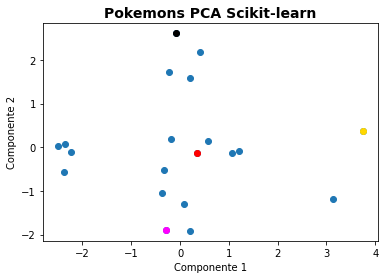

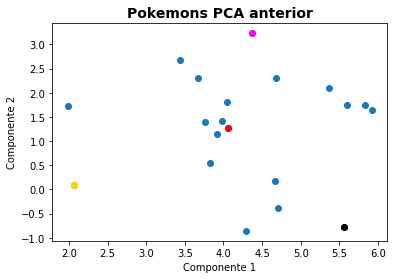

In [ ]:
fig2, ax2 = plt.subplots()
fig, ax = plt.subplots()

# PCA Scikit-learn
ax2.scatter(Pokemons_componentes_PCA2[:,0], Pokemons_componentes_PCA2[:,1])
ax2.scatter(Pokemons_componentes_PCA2[9,0], Pokemons_componentes_PCA2[9,1], color = 'r')
ax2.scatter(Pokemons_componentes_PCA2[12,0], Pokemons_componentes_PCA2[12,1], color = 'magenta')
ax2.scatter(Pokemons_componentes_PCA2[10,0], Pokemons_componentes_PCA2[10,1], color = 'gold')
ax2.scatter(Pokemons_componentes_PCA2[16,0], Pokemons_componentes_PCA2[16,1], color = 'k')
ax2.set_title('Pokemons PCA Scikit-learn', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax2.set_xlabel("Componente 1")
ax2.set_ylabel("Componente 2")

# PCA anterior
ax.scatter(pokemons_componente1, pokemons_componente2)
ax.scatter(pokemons_componente1[9], pokemons_componente2[9], color = 'r')
ax.scatter(pokemons_componente1[12], pokemons_componente2[12], color = 'magenta')
ax.scatter(pokemons_componente1[10], pokemons_componente2[10], color = 'gold')
ax.scatter(pokemons_componente1[16], pokemons_componente2[16], color = 'k')
ax.set_title('Pokemons PCA anterior', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")

plt.show()

En la nueva gráfica, se observa también bastante dispersión de los puntos, por lo que tampoco existe correlación entre las nuevas componentes.

Sin embargo, se han puesto de otro color los mismos Pokemons que en el PCA anterior, y se observa que cambian bastante su posición relativa en la gráfica y por tanto sus valores en las componentes. Esto, se podría aplicar al resto de Pokemons, y es resultado de los cambios de posición y signo de los coeficientes de los nuevos autovectores; y también por calcular los valores a partir de los datos estandarizados, como realiza esta libería a diferencia de como se hizo en el PCA realizado previamente por los motivos ya explicados.

Si se hubiesen puesto otros Pokemons de un color diferente, al final las conclusiones de porque tienen un valor concreto hubiesen sido las mismas que en el PCA anterior, en cambio de esta forma, se puede realizar una buena comparación.

In [ ]:
expl_atributos_componente_1 = abs(PCA_alternativo.components_[0]*100/sum(abs(PCA_alternativo.components_)))
df_expl_atributos_componente_1 = pd.DataFrame(expl_atributos_componente_1, index=indx, columns=['Explicación atributos componente 1 (%)'])

expl_atributos_componente_2 = abs(PCA_alternativo.components_[1]*100/sum(abs(PCA_alternativo.components_)))
df_expl_atributos_componente_2 = pd.DataFrame(expl_atributos_componente_2, index=indx, columns=['Explicación atributos componente 2 (%)'])

In [ ]:
df_expl_atributos_componente_1.style.set_table_styles([{'selector': 'th,td', 'props': [('font-size', '10pt'),('border-style','solid'),('border-width','1px')]}])

,Explicación atributos componente 1 (%)
PS,23.654950
Ataque,22.334391
Defensa,14.379927
Ataque especial,18.839068
Defensa especial,22.206143
Velocidad,12.142166


In [ ]:
print("Primera componente más importante;\n",PCA_alternativo.components_[0])

Primera componente más importante;
 [-0.45454125 -0.45072878 -0.31882326 -0.42331653 -0.48098891 -0.27935701]


Se observa que en esta componente los atributos tienen una importancia bastante repartida en comparación con la componente principal más importante del PCA anterior. Además, todos sus coeficientes son negativos y de magnitud similar.

In [ ]:
df_expl_atributos_componente_2.style.set_table_styles([{'selector': 'th,td', 'props': [('font-size', '10pt'),('border-style','solid'),('border-width','1px')]}])

,Explicación atributos componente 2 (%)
PS,8.247159
Ataque,12.486084
Defensa,28.505521
Ataque especial,17.012789
Defensa especial,7.780247
Velocidad,25.247749


In [ ]:
print("Segunda componente más importante;\n",PCA_alternativo.components_[1])

Segunda componente más importante;
 [-0.15847313  0.25198079  0.63200759 -0.38227978  0.16852151 -0.58087953]


En esta componente, están menos repartidos los porcentajes de explicación de los atributos y sus coeficientes de magnitud más parecida que en la otra componente, pero ocurre lo contario si comparamos esta misma componente con la del PCA anterior. 

Por otro lado, algunos coeficientes tienen signo positivo y otros negativos, por lo que como es lógico y se observa en la gráfica, la combinación lineal de los atributos de todos los Pokemons, esté mas concentrada cerca del 0 que en la otra componente.

Ahora, se analizan los 4 pokemons que no se han puesto como puntos de color azul. Como se trabaja con los atributos estandarizados, la media sera 0 y la desviación típica 1 en todos los atributos. 


### Pokemon Punto Amarillo

Valores de sus atributos estandarizados:

In [ ]:
df_amarillo = pd.DataFrame(matrix_std[10], index=indx, columns=['Pokemon Punto Amarillo'])
def highlight_x(s):
  return ["background-color: yellow;",""]
df_amarillo.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'yellow'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Amarillo
PS,-1.630820
Ataque,-2.118189
Defensa,-0.750000
Ataque especial,-1.171700
Defensa especial,-1.750000
Velocidad,-1.669787


Este Pokemon, como se observa en la gráfica, tiene un valor relativo bastante alto en la componente 1. Esto, se debe a que todos sus atributos estandarizados son negativos, al igual que los coeficientes de esta componente. Esto, resulta en una combinación lineal que es la suma de valores positivos, mientras que en el resto de Pokemons no tiene por qué ser así.

Por este mismo motivo, en la segunda componente tiene un valor bastante más cercano a la media, encontrándose en la segunda componente en la gráfica bastante centrado. 

En la gráfica del PCA anterior, era el Pokemon que más se acerca al origen de la gráfica, mientras que en este caso ocurre lo contrario.

### Pokemon Punto Rosa

Valores de sus atributos estandarizados:

In [ ]:
df_rosa = pd.DataFrame(matrix_std[12], index=indx, columns=['Pokemon Punto Rosa'])
df_rosa.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'pink'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Rosa
PS,-0.326164
Ataque,-1.031938
Defensa,-0.750000
Ataque especial,0.564152
Defensa especial,0.750000
Velocidad,1.940563


Este Pokemon, no se aleja tanto del origen de la gráfica en el nuevo PCA.

En la primera componente, se compensan los signos positivos y negativos de los atributos estandarizados, teniendo un valor cercano al 0.

En la segunda componente, al tener un valor alto y negativo en el atributo de defensa, que es el que más influencia tiene esa componente, tiene el valor negativo de mayor magnitud en esta componente.

### Pokemon Punto Rojo

Valores de sus atributos estandarizados:

In [ ]:
df_rojo = pd.DataFrame(matrix_std[9], index=indx, columns=['Pokemon Punto Rojo'])
df_rojo.style.set_properties(**{'border': '1.3px solid black', 'background-color' : 'red', 'color': 'white'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon Punto Rojo
PS,0.978492
Ataque,0.054313
Defensa,-0.750000
Ataque especial,-0.303774
Defensa especial,-0.500000
Velocidad,-0.767199


Este pokemon, es el más similar gráficamente en los 2 PCA realizados, ya que se encuentra centrado respecto al resto de Pokemons.

Sin embargo, esta vez esto se produce por la compensación de valores positivos y negativos, y de sus correspondientes magnitudes, tanto en las componentes como en sus atributos.

### Pokemon Punto Negro

Valores de sus atributos estandarizados:

In [ ]:
df_negro = pd.DataFrame(matrix_std[16], index=indx, columns=['Pokemon punto negro'])
df_negro.style.set_properties(**{'border': '1.3px solid white', 'background-color' : 'black', 'color': 'white'}).set_table_styles([{'selector': 'th,td', 'props': [('font-size', '12pt'),('border-style','solid'),('border-width','1px')]}])

,Pokemon punto negro
PS,-1.630820
Ataque,0.054313
Defensa,1.750000
Ataque especial,-1.171700
Defensa especial,2.000000
Velocidad,-0.767199


Este Pokemon, cambia bastante gráficamente en el nuevo PCA, teniendo un valor cercano al 0 en la primera componente, producto de la compensación de valores positivos y negativos de sus atributos al realizar la combinación lineal (los coeficientes de la componente son todos negativos por lo tanto no afecta a esto).

En la segunda componente, teniendo en cuenta que la media de todos los Pokemons en los atributos  estandarizados es 0 y la desviación típica 1, el valor positivo de gran magnitud en la segunda componente es resultado de que también lo sea su valor en el atributo velocidad.

## Conclusión de la gráfica y del PCA con Scikit-learn
A partir de los PCA, se puede determinar que los 2 procesos tienen resultados igual de óptimo (como prueba la varianza de los nuevos autovalores), sin embargo al trabajar con datos estandarizados los Pokemos cambian gráficamente en la representación de sus valores en las componentes creadas.

En los 2 casos, se ha conseguido reducir con éxito la dimensionalidad de forma óptima, y por tanto han logrado el objetivo de esta práctica.